# Handling Categorical Data in Python

If you are familiar with machine learning, you will probably have encountered **categorical features** in many datasets. These generally include different categories or levels associated with the observation, which are non-numerical and thus need to be converted (*to numerical values*) so machines can process them.

In this tutorial, you’ll learn the common tricks to handle this type of data and preprocess it to build machine learning models with them. More specifically, you will learn:

- The difference between **categorical** and **continuous** data in your dataset and identifying the type of data.
- to do **basic exploration** of such data to extract information from it.
- You will learn more about various **encoding techniques** in machine learning for categorical data in Python.

## Identifying Categorical Data: Nominal, Ordinal and Continuous

Categorical features can only take on a limited, and usually fixed, number of possible values. For example, if a dataset is about information related to users, then you will typically find features like *country*, *gender*, *age group*, etc. Alternatively, if the data you're working with is related to products, you will find features like product type, manufacturer, seller and so on.

These are all categorical features in your dataset. These features are typically stored as **text values** which represent various traits of the observations. For example, gender is described as **Male (M)** or **Female (F)**, product type could be described as electronics, apparels, food etc.

Note that these type of features where the categories are only labeled without any order of precedence are called nominal features.

Features which have some order associated with them are called ordinal features. For example, a feature like economic status, with three categories: *low*, *medium* and *high*, which have an order associated with them.

There are also continuous features. These are numeric variables that have an infinite number of values between any two values. A continuous variable can be numeric or a date/time.

Regardless of what the value is used for, the challenge is determining how to use this data in the analysis because of the following constraints:

- Categorical features may have a very large number of levels, known as **high cardinality**, (for example, cities or URLs), where most of the levels appear in a relatively small number of instances.
- Many machine learning models, such as regression or SVM, are algebraic. This means that their input must be **numerical**. To use these models, categories must be transformed into numbers first, before you can apply the learning algorithm on them.
- While some ML packages or libraries might transform categorical data to numeric automatically based on some default embedding method, many other ML packages don’t support such inputs.
- For the machine, categorical data doesn’t contain the same context or information that humans can easily associate and understand. For example, when looking at a feature called `City` with three cities `New York`, `New Jersey` and `New Delhi`, humans can infer that `New York` is closely related to `New Jersey` as they are from same country, while `New York` and ``New Delhi`` are much different. But for the model, `New York`, `New Jersey` and `New Delhi`, are just three different levels (possible values) of the same feature `City`. If you don’t specify the additional contextual information, it will be impossible for the model to differentiate between highly different levels.

You therefore are faced with the challenge of figuring out how to turn these text values into numerical values for further processing and unmask lots of interesting information which these features might hide. Typically, any standard work-flow in feature engineering involves some form of transformation of these categorical values into numeric labels and then applying some encoding scheme on these values.

## General Exploration steps for Categorical Data
In this section, you'll focus on dealing with categorical features in the `pnwflights14` dataset, but you can apply the same procedure to all kinds of datasets. `pnwflights14` is a modified version of Hadley Wickham's `nycflights13` dataset and contains information about all flights that departed from the two major airports of the Pacific Northwest (PNW), SEA in Seattle and PDX in Portland, in 2014: 162,049 flights in total.

To help understand what causes delays, it also includes a number of other useful datasets:

- `weather`: the hourly meterological data for each airport
- `planes`: constructor information about each plane
- `airports`: airport names and locations
- `airlines`: translation between two letter carrier codes and names

The datasets can be found [here](https://github.com/ismayc/pnwflights14).

Since it's always a good idea to understand before starting working on it, you'll briefly explore the data! To do this, you will first import the basic libraries that you will be using throughout the tutorial, namely `pandas`, `numpy` and `copy`.

Also make sure that you set Matplotlib to plot inline, which means that the outputted plot will appear immediately under each code cell.

In [ ]:
import pandas as pd
import numpy as np
import copy
%matplotlib inline

Next you will read the flights dataset in a **pandas DataFrame** with `read_csv()` and check the contents with the `.head()` method.

In [ ]:
df_flights = pd.read_csv('https://raw.githubusercontent.com/DrJieTao/ba545-docs/master/data/flights.csv')

df_flights.head()


,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2014,1,1,1.0,96.0,235.0,70.0,AS,N508AS,145,PDX,ANC,194.0,1542,0.0,1.0
1,2014,1,1,4.0,-6.0,738.0,-23.0,US,N195UW,1830,SEA,CLT,252.0,2279,0.0,4.0
2,2014,1,1,8.0,13.0,548.0,-4.0,UA,N37422,1609,PDX,IAH,201.0,1825,0.0,8.0
3,2014,1,1,28.0,-2.0,800.0,-23.0,US,N547UW,466,PDX,CLT,251.0,2282,0.0,28.0
4,2014,1,1,34.0,44.0,325.0,43.0,AS,N762AS,121,SEA,ANC,201.0,1448,0.0,34.0


As you will probably notice, the DataFrame above contains all kinds of information about flights like year, departure delay, arrival time, carrier, destination, etc.

The next step is to gather some information about different column in your DataFrame. You can do so by using `.info()`, which basically gives you information about the number of rows, columns, column data types, memory usage, etc.

In [ ]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162049 entries, 0 to 162048
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       162049 non-null  int64  
 1   month      162049 non-null  int64  
 2   day        162049 non-null  int64  
 3   dep_time   161192 non-null  float64
 4   dep_delay  161192 non-null  float64
 5   arr_time   161061 non-null  float64
 6   arr_delay  160748 non-null  float64
 7   carrier    162049 non-null  object 
 8   tailnum    161801 non-null  object 
 9   flight     162049 non-null  int64  
 10  origin     162049 non-null  object 
 11  dest       162049 non-null  object 
 12  air_time   160748 non-null  float64
 13  distance   162049 non-null  int64  
 14  hour       161192 non-null  float64
 15  minute     161192 non-null  float64
dtypes: float64(7), int64(5), object(4)
memory usage: 19.8+ MB


As you already knew, columns like `year`, `month` and `day` are read as integers, and `dep_time`, `dep_delay` etc. are read as floats.

The columns with object `dtype` are the possible **categorical** features in your dataset.

The reason why you would say that these categorical features are 'possible' is because you **should NOT** completely rely on `.info()` to get the real data type of the values of a feature, as some missing values that are represented as strings in a continuous feature can coerce it to read them as `object` dtypes.

That's why it's always a good idea to investigate your raw dataset thoroughly and then think about cleaning it.

One of the most common ways to analyze the relationship between a categorical feature and a continuous feature is to plot a boxplot. The boxplot is a simple way of representing statistical data on a plot in which a rectangle is drawn to represent the second and third quartiles, usually with a vertical line inside to indicate the median value. The lower and upper quartiles are shown as horizontal lines at either side of the rectangle.

You can plot a boxplot by invoking `.boxplot()` on your DataFrame. Here, you will plot a boxplot of the `dep_time` column with respect to the two origin of the flights from `PDX` and `SEA`.

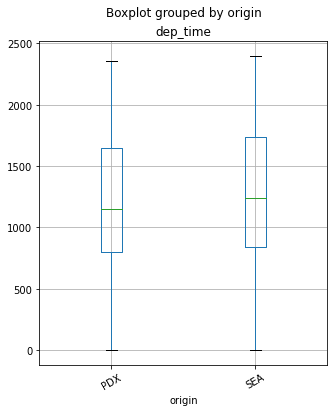

In [ ]:
df_flights.boxplot('dep_time','origin',rot = 30,figsize=(5,6))

As you will only be dealing with categorical features in this tutorial, it's better to filter them out. You can create a separate DataFrame consisting of only these features by running the following command. The method `.copy()` is used here so that any changes made in new DataFrame don't get reflected in the original one.

**NOTE**: it is always a good practice to make a copy of the dataset when you want to change it.

In [ ]:
cat_df_flights = df_flights.select_dtypes(include=['object']).copy()

Again, use the `.head()` method to check if you have filtered the required columns.

In [ ]:
cat_df_flights.head()

,carrier,tailnum,origin,dest
0,AS,N508AS,PDX,ANC
1,US,N195UW,SEA,CLT
2,UA,N37422,PDX,IAH
3,US,N547UW,PDX,CLT
4,AS,N762AS,SEA,ANC


One of the most common data pre-processing steps is to check for **null** values in the dataset. You can get the total number of missing values in the DataFrame by the following one liner code:

In [ ]:
cat_df_flights.isnull().values.sum()

248

Let's also check the column-wise distribution of null values:

In [ ]:
cat_df_flights.isnull().sum()

carrier      0
tailnum    248
origin       0
dest         0
dtype: int64

It seems that only the `tailnum` column has null values. You can do a **mode imputation** for those null values. The function `fillna()` is handy for such operations.

Note the chaining of method `.value_counts()` in the code below. This returns the frequency distribution of each category in the feature, and then selecting the top category, which is the mode, with the `.index` attribute.



In [ ]:
cat_df_flights = cat_df_flights.fillna(cat_df_flights['tailnum'].value_counts().index[0])

Tip: read more about method chaining with pandas [here](https://www.datacamp.com/community/tutorials/pandas-idiomatic).

Let's check the number of null values after imputation should result in a zero count.

In [ ]:
cat_df_flights.isnull().values.sum()

0

There are several ways of checking if there is any null value in a dataset - please use them when you are doing your own EDA.

Also, NULL values are not the only *missing* values we want/need to deal with - for instance, a `-1` value in the `age` column is also missing.

Another Exploratory Data Analysis (EDA) step that you might want to do on categorical features is the frequency distribution of categories within the feature, which can be done with the `.value_counts()` method as described earlier.

In [ ]:
cat_df_flights['carrier'].value_counts()

AS    62460
WN    23355
OO    18710
DL    16716
UA    16671
AA     7586
US     5946
B6     3540
VX     3272
F9     2698
HA     1095
Name: carrier, dtype: int64

To know the count of distinct categories within the feature you can chain the previous code with the `.count()` method:

In [ ]:
cat_df_flights['carrier'].value_counts().count()

11

Visual exploration is the most effective way to extract information between variables.

Below is a basic template to plot a barplot of the frequency distribution of a categorical feature using the `seaborn` package, which shows the frequency distribution of the `carrier` column. You can play with different arguments to change the look of the plot. If you want to learn more about seaborn, you can take a look at this [tutorial](https://www.datacamp.com/community/tutorials/seaborn-python-tutorial).

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


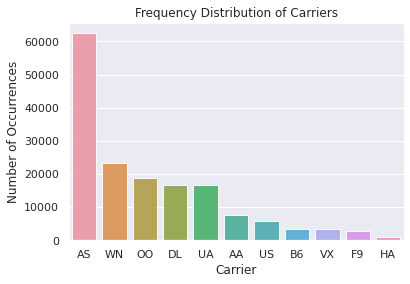

In [ ]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
carrier_count = cat_df_flights['carrier'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of Carriers')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Carrier', fontsize=12)
plt.show()

Similarly, you could plot a pie chart with the `matplotlib` library to get the same information. The `labels` list below holds the category names from the `carrier` column:

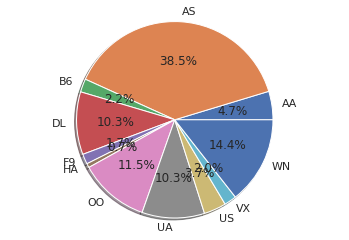

In [ ]:
labels = cat_df_flights['carrier'].astype('category').cat.categories.tolist()
counts = cat_df_flights['carrier'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

## Encoding Categorical Data

You will now learn different techniques to encode the categorical features to numeric quantities. To keep it simple, you will apply these encoding methods only on the `carrier` column. However, the same approach can be extended to all columns.

The techniques that you'll cover are the following:

- Replacing values
- Encoding labels
- One-Hot encoding
- Binary encoding
- Backward difference encoding
- Miscellaneous features

### Replace Values
Let's start with the most basic method, which is just replacing the categories with the desired numbers. This can be achieved with the help of the `replace()` function in `pandas`. The idea is that you have the liberty to choose whatever numbers you want to assign to the categories according to the business use case.

You will now create a dictionary which contains mapping numbers for each category in the `carrier` column:

In [ ]:
replace_map = {'carrier': {'AA': 1, 'AS': 2, 'B6': 3, 'DL': 4,
                                  'F9': 5, 'HA': 6, 'OO': 7 , 'UA': 8 , 'US': 9,'VX': 10,'WN': 11}}


Note that defining a mapping via a hard coded dictionary is easy when the number of categories is low, like in this case which is `11`. You can achieve the same mapping with the help of [dictionary comprehensions](https://www.datacamp.com/community/tutorials/python-dictionary-comprehension) as shown below. This will be useful when the categories count is high and you don't want to type out each mapping. You will store the category names in a list called `labels` and then `zip` it to a seqeunce of numbers and iterate over it.

In [ ]:
labels = cat_df_flights['carrier'].astype('category').cat.categories.tolist()
replace_map_comp = {'carrier' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

print(replace_map_comp)


{'carrier': {'AA': 1, 'AS': 2, 'B6': 3, 'DL': 4, 'F9': 5, 'HA': 6, 'OO': 7, 'UA': 8, 'US': 9, 'VX': 10, 'WN': 11}}


Throughout this tutorial, you will be making a copy of the dataset via the `.copy()` method to practice each encoding technique to ensure that the original DataFrame stays intact and whatever changes you are doing happen only in the copied one.

In [ ]:
cat_df_flights_replace = cat_df_flights.copy()

Use the `replace()` function on the DataFrame by passing the mapping dictionary as argument:

In [ ]:
cat_df_flights_replace.replace(replace_map_comp, inplace=True)

cat_df_flights_replace.head()

,carrier,tailnum,origin,dest
0,2,N508AS,PDX,ANC
1,9,N195UW,SEA,CLT
2,8,N37422,PDX,IAH
3,9,N547UW,PDX,CLT
4,2,N762AS,SEA,ANC


As you can observe, you have encoded the categories with the mapped numbers in your DataFrame.

You can also check the dtype of the newly encoded column, which is now converted to integers.

In [ ]:
## Please add your code here to check if the data type of the newly added
## column is indeed 'int64'


Tip: in Python, it's a good practice to typecast categorical features to a `category` dtype because they make the operations on such columns much faster than the `object` dtype. You can do the typecasting by using `.astype()` method on your columns like shown below:

In [ ]:
cat_df_flights_lc = cat_df_flights.copy()
cat_df_flights_lc['carrier'] = cat_df_flights_lc['carrier'].astype('category')
cat_df_flights_lc['origin'] = cat_df_flights_lc['origin'].astype('category')                                                              

cat_df_flights_lc.dtypes

carrier    category
tailnum      object
origin     category
dest         object
dtype: object

You can validate the faster operation of the `category` dtype by timing the execution time of the same operation done on a DataFrame with columns as `category` dtype and `object` dtype by using the `time` library.

Let's say you want to calculate the number of flights for each carrier from each `origin` places, you can use the `.groupby()` and `.count()` methods on your DataFrame to do so.

In [ ]:
import time
#DataFrame with object dtype columns

%timeit cat_df_flights.groupby(['origin','carrier']).count() 

10 loops, best of 3: 37.3 ms per loop


In [ ]:
#DataFrame with category dtype columns
%timeit cat_df_flights_lc.groupby(['origin','carrier']).count() 

10 loops, best of 3: 22.6 ms per loop


Note that the DataFrame with `category` dtype is much faster.

### Label Encoding
Another approach is to encode categorical values with a technique called "label encoding", which allows you to convert each value in a column to a number. Numerical labels are always between 0 and n_categories-1.

You can do label encoding via attributes `.cat.codes` on your DataFrame's column.

In [ ]:
cat_df_flights_lc['carrier'] = cat_df_flights_lc['carrier'].cat.codes
cat_df_flights_lc.head() #alphabetically labeled from 0 to 10

,carrier,tailnum,origin,dest
0,1,N508AS,PDX,ANC
1,8,N195UW,SEA,CLT
2,7,N37422,PDX,IAH
3,8,N547UW,PDX,CLT
4,1,N762AS,SEA,ANC


Sometimes, you might just want to encode a bunch of categories within a feature to some numeric value and encode all the other categories to some other numeric value.

You could do this by using `numpy`'s `where()` function like shown below. You will encode all the `US` carrier flights to value `1` and `other` carriers to value `0`. This will create a new column in your DataFrame with the encodings. Later, if you want to drop the original column, you can do so by using the `drop()` function in `pandas`.

In [ ]:
cat_df_flights_specific = cat_df_flights.copy()
cat_df_flights_specific['US_code'] = np.where(cat_df_flights_specific['carrier'].str.contains('US'), 1, 0)

cat_df_flights_specific.head()


,carrier,tailnum,origin,dest,US_code
0,AS,N508AS,PDX,ANC,0
1,US,N195UW,SEA,CLT,1
2,UA,N37422,PDX,IAH,0
3,US,N547UW,PDX,CLT,1
4,AS,N762AS,SEA,ANC,0


You can achieve the same label encoding using `scikit-learn`'s `LabelEncoder`:

In [ ]:
cat_df_flights_sklearn = cat_df_flights.copy()

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
cat_df_flights_sklearn['carrier_code'] = lb_make.fit_transform(cat_df_flights['carrier'])

cat_df_flights_sklearn.head() #Results in appending a new column to df

,carrier,tailnum,origin,dest,carrier_code
0,AS,N508AS,PDX,ANC,1
1,US,N195UW,SEA,CLT,8
2,UA,N37422,PDX,IAH,7
3,US,N547UW,PDX,CLT,8
4,AS,N762AS,SEA,ANC,1


Label encoding is pretty much intuitive and straight-forward and may give you a good performance from your learning algorithm, but it has as disadvantage that the numerical values can be misinterpreted by the algorithm. Should the carrier `US` (encoded to `8`) be given **8x** more weight than the carrier `AS` (encoded to `1`) ?

To solve this issue there is another popular way to encode the categories via something called `one-hot encoding`.

### One-Hot encoding
The basic strategy is to convert each category value into a new column and assign an `1` or `0` (True/False) value to the column. This has the benefit of not weighting a value improperly.

There are many libraries out there that support one-hot encoding but the simplest one is using `pandas`' `.get_dummies()` method.

This function is named this way because it creates dummy/indicator variables (1 or 0). There are mainly three arguments important here, the first one is the `DataFrame` you want to encode on, second being the `columns` argument which lets you specify the columns you want to do encoding on, and third, the prefix argument which lets you specify the `prefix` for the `new columns` that will be created after encoding.

In [ ]:
cat_df_flights_onehot = cat_df_flights.copy()
cat_df_flights_onehot = pd.get_dummies(cat_df_flights_onehot, columns=['carrier'], prefix = ['carrier'])

cat_df_flights_onehot.head()

,tailnum,origin,dest,carrier_AA,carrier_AS,carrier_B6,carrier_DL,carrier_F9,carrier_HA,carrier_OO,carrier_UA,carrier_US,carrier_VX,carrier_WN
0,N508AS,PDX,ANC,0,1,0,0,0,0,0,0,0,0,0
1,N195UW,SEA,CLT,0,0,0,0,0,0,0,0,1,0,0
2,N37422,PDX,IAH,0,0,0,0,0,0,0,1,0,0,0
3,N547UW,PDX,CLT,0,0,0,0,0,0,0,0,1,0,0
4,N762AS,SEA,ANC,0,1,0,0,0,0,0,0,0,0,0


As you can see, the column `carrier_AS` gets value `1` at the 0th and 4th observation points as those points had the `AS` category labeled in the original DataFrame. Likewise for other columns also.

`scikit-learn` also supports one hot encoding via `LabelBinarizer` and `OneHotEncoder` in its preprocessing module (check out the details here). Just for the sake of practicing you will do the same encoding via `LabelBinarizer` (although we use `OneHotEncoder` more often):

In [ ]:
cat_df_flights_onehot_sklearn = cat_df_flights.copy()

from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
lb_results = lb.fit_transform(cat_df_flights_onehot_sklearn['carrier'])
lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)

lb_results_df.head()

,AA,AS,B6,DL,F9,HA,OO,UA,US,VX,WN
0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,0


Note that this `lb_results_df` resulted in a new DataFrame with only the one hot encodings for the feature `carrier`. This needs to be concatenated back with the original DataFrame, which can be done via `pandas`' `.concat()` method. The axis argument is set to `1` as you want to merge on columns.

In [ ]:
result_df = pd.concat([cat_df_flights_onehot_sklearn, lb_results_df], axis=1)

result_df.head()

,carrier,tailnum,origin,dest,AA,AS,B6,DL,F9,HA,OO,UA,US,VX,WN
0,AS,N508AS,PDX,ANC,0,1,0,0,0,0,0,0,0,0,0
1,US,N195UW,SEA,CLT,0,0,0,0,0,0,0,0,1,0,0
2,UA,N37422,PDX,IAH,0,0,0,0,0,0,0,1,0,0,0
3,US,N547UW,PDX,CLT,0,0,0,0,0,0,0,0,1,0,0
4,AS,N762AS,SEA,ANC,0,1,0,0,0,0,0,0,0,0,0


While one-hot encoding solves the problem of unequal weights given to categories within a feature, it is not very useful when there are many categories, as that will result in formation of as many new columns, which can result in the [curse of dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality). The concept of the “curse of dimensionality” discusses that in high-dimensional spaces some things just stop working properly.

### Binary Encoding
This technique is not as intuitive as the previous ones. In this technique, first the categories are encoded as ordinal, then those integers are converted into binary code, then the digits from that binary string are split into separate columns. This encodes the data in fewer dimensions than one-hot.

You can do binary encoding via a number of ways but the simplest one is using the `category_encoders` library. You can install category_encoders via pip install category_encoders on cmd or just download and extract the .tar.gz file from the site.

You have to first import the `category_encoders` library after installing it. Invoke the `BinaryEncoder` function by specifying the columns you want to encode and then call the `.fit_transform()` method on it with the DataFrame as the argument.



In [ ]:
!pip install category_encoders

     |████████████████████████████████| 81kB 2.2MB/s 


In [ ]:
cat_df_flights_ce = cat_df_flights.copy()

import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['carrier'])
df_binary = encoder.fit_transform(cat_df_flights_ce)

df_binary.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,carrier_0,carrier_1,carrier_2,carrier_3,carrier_4,tailnum,origin,dest
0,0,0,0,0,1,N508AS,PDX,ANC
1,0,0,0,1,0,N195UW,SEA,CLT
2,0,0,0,1,1,N37422,PDX,IAH
3,0,0,0,1,0,N547UW,PDX,CLT
4,0,0,0,0,1,N762AS,SEA,ANC


Notice that four new columns are created in place of the `carrier` column with binary encoding for each category in the feature.

Note that `category_encoders` is a very useful library for encoding categorical columns. Not only does it support one-hot, binary and label encoding, but also other advanced encoding methods like Helmert contrast, polynomial contrast, backward difference, etc.

### Backward Difference Encoding
This technique falls under the contrast coding system for categorical features. A feature of K categories, or levels, usually enters a regression as a sequence of K-1 dummy variables. In backward difference coding, the mean of the dependent variable for a level is compared with the mean of the dependent variable for the prior level. This type of coding may be useful for a nominal or an ordinal variable.

If you want to learn other contrast coding methods you can check out this [resource](http://www.statsmodels.org/dev/contrasts.html).

The code structure is pretty much the same as any method in the `category_encoders` library, just this time you will call `BackwardDifferenceEncoder` from it:

In [ ]:
encoder = ce.BackwardDifferenceEncoder(cols=['carrier'])
df_bd = encoder.fit_transform(cat_df_flights_ce)

df_bd.head()

/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,intercept,carrier_0,carrier_1,carrier_2,carrier_3,carrier_4,carrier_5,carrier_6,carrier_7,carrier_8,carrier_9,tailnum,origin,dest
0,1,-0.909091,-0.818182,-0.727273,-0.636364,-0.545455,-0.454545,-0.363636,-0.272727,-0.181818,-0.090909,N508AS,PDX,ANC
1,1,0.090909,-0.818182,-0.727273,-0.636364,-0.545455,-0.454545,-0.363636,-0.272727,-0.181818,-0.090909,N195UW,SEA,CLT
2,1,0.090909,0.181818,-0.727273,-0.636364,-0.545455,-0.454545,-0.363636,-0.272727,-0.181818,-0.090909,N37422,PDX,IAH
3,1,0.090909,-0.818182,-0.727273,-0.636364,-0.545455,-0.454545,-0.363636,-0.272727,-0.181818,-0.090909,N547UW,PDX,CLT
4,1,-0.909091,-0.818182,-0.727273,-0.636364,-0.545455,-0.454545,-0.363636,-0.272727,-0.181818,-0.090909,N762AS,SEA,ANC


The interesting thing here is that you can see that the results are not the standard 1’s and 0’s you saw in the dummy encoding examples but rather regressed continuous values.

### Miscellaneous Features
Sometimes you may encounter categorical feature columns which specify the ranges of values for observation points, for example, the `age` column might be described in the form of categories like 0-20, 20-40 and so on.

While there can be a lot of ways to deal with such features, the most common ones are either split these ranges into two separate columns or replace them with some measure like the mean of that range.

You will first create a dummy DataFrame which has just one feature `age` with ranges specified using the pandas `DataFrame` function. Then you will split the column on the delimeter - into two columns `start` and `end` using `split()` with a `lambda()` function. If you want to learn more about lambda functions, check out this [tutorial](https://www.datacamp.com/community/tutorials/functions-python-tutorial).

In [ ]:
dummy_df_age = pd.DataFrame({'age': ['0-20', '20-40', '40-60','60-80']})
dummy_df_age['start'], dummy_df_age['end'] = zip(*dummy_df_age['age'].map(lambda x: x.split('-')))

dummy_df_age.head()

,age,start,end
0,0-20,0,20
1,20-40,20,40
2,40-60,40,60
3,60-80,60,80


To replace the range with its mean, you will write a `split_mean()` function which basically takes one range at a time, splits it, then calculates the mean and returns it. To apply a certain function to all the entities of a column you will use the `.apply()` method:

In [ ]:
dummy_df_age = pd.DataFrame({'age': ['0-20', '20-40', '40-60','60-80']})


In [ ]:
def split_mean(x):
    split_list = x.split('-')
    mean = (float(split_list[0])+float(split_list[1]))/2
    return mean

dummy_df_age['age_mean'] = dummy_df_age['age'].apply(lambda x: split_mean(x))

dummy_df_age.head()

,age,age_mean
0,0-20,10.0
1,20-40,30.0
2,40-60,50.0
3,60-80,70.0
